# Case Study on Regression

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data from local folder

In [245]:
data = pd.read_csv(r"C:\Users\sruth\OneDrive\Desktop\car_age_price.csv")

#  Basic details of the dataset

In [246]:
data.shape

(112, 2)

In [247]:
data.head(10)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
6,2016,425000
7,2017,575000
8,2017,509999
9,2017,575000


In [248]:
data['Price'].mean()

483866.04464285716

In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [250]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


# Missing Value Handling

In [251]:
data.isna().sum()

Year     0
Price    0
dtype: int64

There is no missing value found

In [252]:
data.dtypes

Year     int64
Price    int64
dtype: object

# Correlation

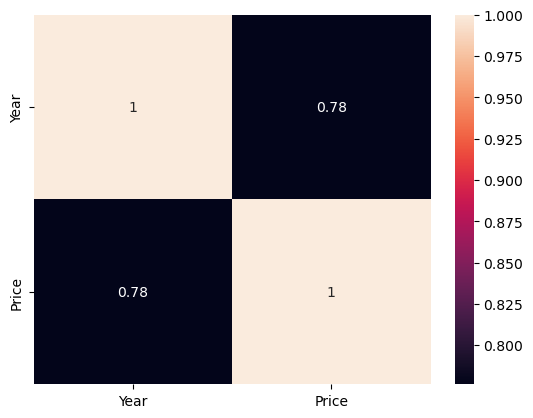

In [253]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [254]:
data.columns

Index(['Year', 'Price'], dtype='object')

# Outlier Handling

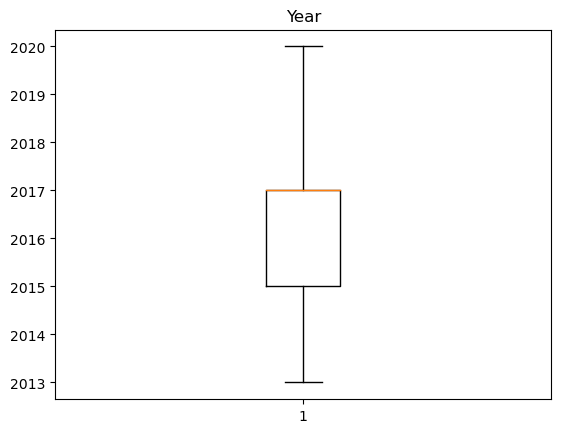

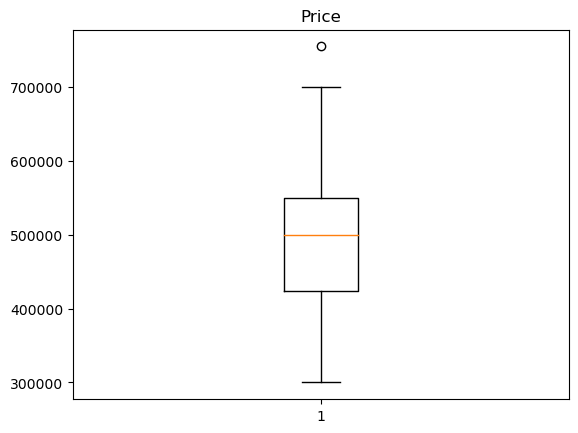

In [255]:
num_cols = ['Year', 'Price']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [256]:
Q1 = np.percentile(data['Price'],25,interpolation='midpoint')
Q2 = np.percentile(data['Price'],50,interpolation='midpoint')
Q3 = np.percentile(data['Price'],75,interpolation='midpoint')

In [257]:
print(Q1)
print(Q2)
print(Q3)

422500.0
500000.0
550000.0


In [258]:
IQR=Q3-Q1

In [259]:
print(IQR)

127500.0


In [260]:
up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

In [261]:
print(up_lim)
print(low_lim)

741250.0
231250.0


In [262]:
outliers = []
for x in data['Price']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)

In [263]:
outliers

[755000]

Only found one outlier in column Price

In [264]:
ind1 = data['Price'] > up_lim
indices = data.loc[ind1].index

In [265]:
indices

Int64Index([1], dtype='int64')

In [266]:
data.drop([1],inplace=True)

In [267]:
data.shape

(111, 2)

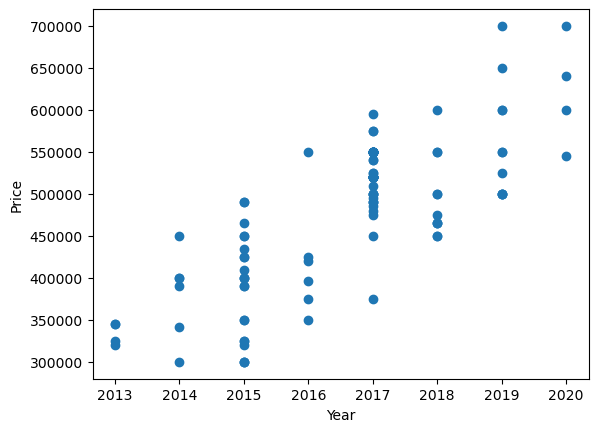

In [268]:
plt.scatter(data['Year'],data['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# Regression

## Linear Regression 

In [269]:
# Split the data into features (year) and target variable (price)
X = data['Year'].values.reshape(-1,1)
y = data['Price'].values

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [272]:
from sklearn.linear_model import LinearRegression

In [273]:
# Linear Regression model
linear_reg = LinearRegression()
model1=linear_reg.fit(X_train, y_train)

In [274]:
linear_y_pred = model1.predict(X_test)

no scaling is required, since it has only one feature

### Evaluation 

In [275]:
linear_y_pred, y_test

(array([620364.4493642 , 370176.02054949, 495270.23495685, 453572.16348773,
        578666.37789509, 495270.23495685, 495270.23495685, 495270.23495685,
        411874.0920186 , 578666.37789509, 495270.23495685, 411874.0920186 ,
        495270.23495685, 495270.23495685, 495270.23495685, 411874.0920186 ,
        578666.37789509, 495270.23495685, 536968.30642596, 495270.23495685,
        328477.94908036, 495270.23495685, 411874.0920186 , 578666.37789509,
        578666.37789509, 411874.0920186 , 495270.23495685, 495270.23495685]),
 array([600000, 400000, 575000, 425000, 600000, 520000, 550000, 550000,
        325000, 550000, 550000, 425000, 490000, 520000, 520000, 350000,
        600000, 520000, 550000, 520000, 345000, 500000, 390000, 500000,
        500000, 300000, 540000, 575000], dtype=int64))

Text(0, 0.5, 'y_pred')

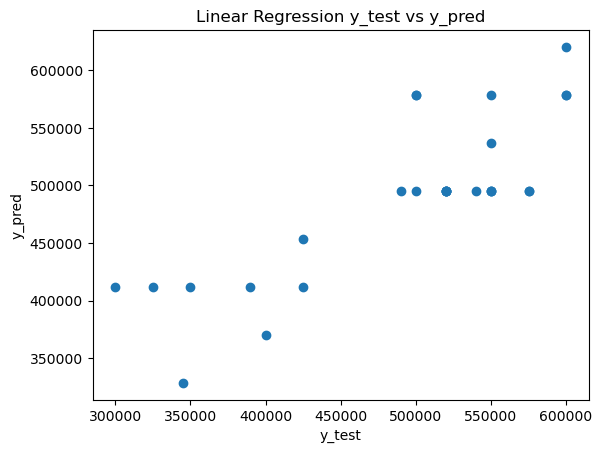

In [276]:
plt.scatter(y_test,linear_y_pred)
plt.title('Linear Regression y_test vs y_pred')            
plt.xlabel('y_test')                          
plt.ylabel('y_pred')

In [277]:
from sklearn.metrics import mean_squared_error,r2_score

In [278]:
print('Linear mean Squared Error =',mean_squared_error(y_test,linear_y_pred))
print('Linear R2 score =',r2_score(y_test,linear_y_pred))

Linear mean Squared Error = 2429380860.130084
Linear R2 score = 0.6703929057122116


## Lasso Regression

In [279]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [280]:

from sklearn. linear_model import Lasso

In [281]:
# Lasso Regression model
lasso_reg = Lasso(alpha=0.1)
model2=lasso_reg.fit(X_train, y_train)

In [282]:
lasso_y_pred = model2.predict(X_test)

### Evaluation

In [283]:
lasso_y_pred, y_test

(array([620364.31555404, 370176.12137829, 495270.21846616, 453572.18610354,
        578666.28319141, 495270.21846616, 495270.21846616, 495270.21846616,
        411874.15374091, 578666.28319141, 495270.21846616, 411874.15374091,
        495270.21846616, 495270.21846616, 495270.21846616, 411874.15374091,
        578666.28319141, 495270.21846616, 536968.25082879, 495270.21846616,
        328478.08901566, 495270.21846616, 411874.15374091, 578666.28319141,
        578666.28319141, 411874.15374091, 495270.21846616, 495270.21846616]),
 array([600000, 400000, 575000, 425000, 600000, 520000, 550000, 550000,
        325000, 550000, 550000, 425000, 490000, 520000, 520000, 350000,
        600000, 520000, 550000, 520000, 345000, 500000, 390000, 500000,
        500000, 300000, 540000, 575000], dtype=int64))

Text(0, 0.5, 'y_pred')

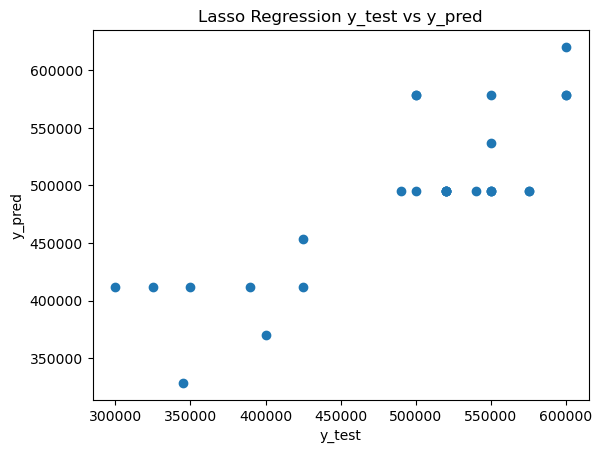

In [284]:
plt.scatter(y_test,lasso_y_pred)
plt.title('Lasso Regression y_test vs y_pred')            
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

In [285]:
print('Lasso Mean Squared Error =',mean_squared_error(y_test,lasso_y_pred))
print('Lasso R2 score =',r2_score(y_test,lasso_y_pred))

Lasso Mean Squared Error = 2429381180.396382
Lasso R2 score = 0.67039286225997


Comparing the mean squared error (MSE) and R-squared (R2) scores for both Lasso regression and Linear regression models, we can see that they have very similar values.In terms of mean squared error, the difference between the two models is minimal: Lasso MSE is slightly higher than Linear MSE.In terms of R-squared score, the values are also very close and indicate that both models explain approximately 67% of the variance in the target variable.Based on these metrics alone, it is difficult to determine a significant difference in performance between Lasso regression and Linear regression. They have similar predictive accuracy for the given dataset.

### Make predictions for the 2022 model using both models 

In [286]:
linear_pred=model1.predict([[2022]])
lasso_pred=model2.predict([[2022]])

In [287]:
# Print the predicted prices
print("Linear Regression predicted price for 2022 model:", linear_pred[0])
print("Lasso Regression predicted price for 2022 model:", lasso_pred[0])


Linear Regression predicted price for 2022 model: 703760.5923024416
Lasso Regression predicted price for 2022 model: 703760.3802792877
